# **Import Package**

In [1]:
# Pustaka untuk mengolah dan visualisasi data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Pustaka keperluan model
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [2]:
#Menampilkan dataset
import pandas as pd
nel = pd.read_csv('Hospital_Indonesia_datasets.csv', sep=';')
nel


,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537
...,...,...,...,...,...,...,...,...,...,...,...,...
3150,9232011,RS Umum Daerah Er Dabi,Papua Pegunungan,Yalimo,Jl. Trans Wamena Jayapura KM. 123 Heahobak Dis...,Rumah Sakit Umum,D,Non BLU/BLUD,Pemkab,35,18,0
3151,9231002,RS Umum Daerah Lukas Enembe Kab. Memberamo Tengah,Papua Pegunungan,Mamberamo Tengah,"Jln. Poros Gimbis Nomor 1, Distrik Kobakma, Ka...",Rumah Sakit Umum,D PRATAMA,Non BLU/BLUD,Pemkab,85,23,47
3152,9201046,RS Tk. IV 17.07.01 Jenderal LB Moerdani,Papua Selatan,Merauke,"Jl. Poros L.B. Moerdani, Kel. Kamangi, Kec. Ta...",Rumah Sakit Umum,D,Non BLU/BLUD,TNI AD,81,24,0
3153,9212027,RS TNI AD Tk. IV Timika,Papua Tengah,Mimika,Jl. Agimuga Mile 32 Desa Karang Senang Distrik...,Rumah Sakit Umum,D,Non BLU/BLUD,TNI AD,60,43,0


# **EDA (Exploratory Data Analysis)**

In [3]:
#Menampilkan info dataset
nel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3155 non-null   int64 
 1   nama                3155 non-null   object
 2   propinsi            3155 non-null   object
 3   kab                 3155 non-null   object
 4   alamat              3155 non-null   object
 5   jenis               3155 non-null   object
 6   kelas               3155 non-null   object
 7   status_blu          3155 non-null   object
 8   kepemilikan         3155 non-null   object
 9   total_tempat_tidur  3155 non-null   int64 
 10  total_layanan       3155 non-null   int64 
 11  total_tenaga_kerja  3155 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 295.9+ KB


Ringkasan dataframe:
*   Data memiliki 11 kolom dan 3155 baris
*   Membuang kolom id karena tidak diperlukan




# **Data Cleaning**

In [4]:
#Membuang kolom id
nel = nel.drop(columns=['id', 'nama','alamat'])

In [5]:
#Periksa jumlah kelas pada kolom kelas
nel['kelas'].value_counts()


,count
kelas,
C,1710
D,854
B,443
A,77
D PRATAMA,64
Belum Ditetapkan,3
Rumah Sakit Umum,3
Rumah Sakit Khusus Jiwa,1


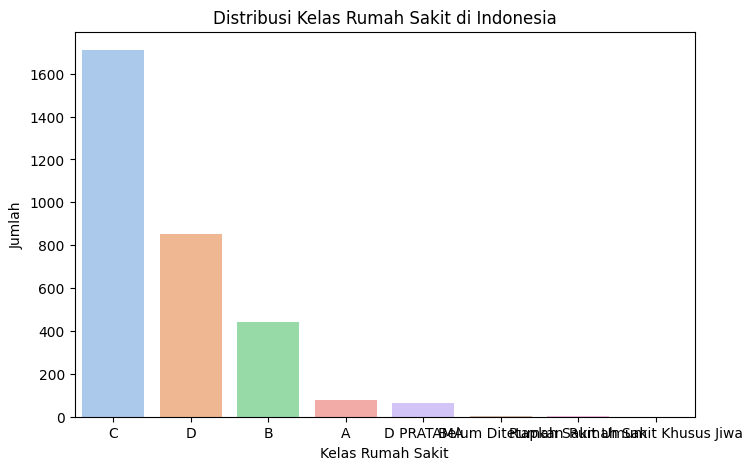

In [6]:
#Menampilkan visualisasi Distribusi Kelas Rumah Sakit di Indonesia
plt.figure(figsize=(8,5))
sns.countplot(data=nel, x='kelas', order=nel['kelas'].value_counts().index, palette='pastel')
plt.title('Distribusi Kelas Rumah Sakit di Indonesia')
plt.xlabel('Kelas Rumah Sakit')
plt.ylabel('Jumlah')
plt.show()


In [7]:
#Simpan hanya data dengan kelas A, B, C, atau D
nel = nel[nel['kelas'].isin(['A', 'B', 'C', 'D'])]


In [8]:
#Periksa apakah label kelas sudah tersisa 4 kelas
nel['kelas'].value_counts()

,count
kelas,
C,1710
D,854
B,443
A,77


In [9]:
#Periksa info dataset terbaru
nel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3084 entries, 0 to 3154
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   propinsi            3084 non-null   object
 1   kab                 3084 non-null   object
 2   jenis               3084 non-null   object
 3   kelas               3084 non-null   object
 4   status_blu          3084 non-null   object
 5   kepemilikan         3084 non-null   object
 6   total_tempat_tidur  3084 non-null   int64 
 7   total_layanan       3084 non-null   int64 
 8   total_tenaga_kerja  3084 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 240.9+ KB


In [10]:
#Periksa missing values
nel.isnull().sum()

,0
propinsi,0
kab,0
jenis,0
kelas,0
status_blu,0
kepemilikan,0
total_tempat_tidur,0
total_layanan,0
total_tenaga_kerja,0


In [11]:
#Periksa duplikat
nel.duplicated().sum()

np.int64(0)

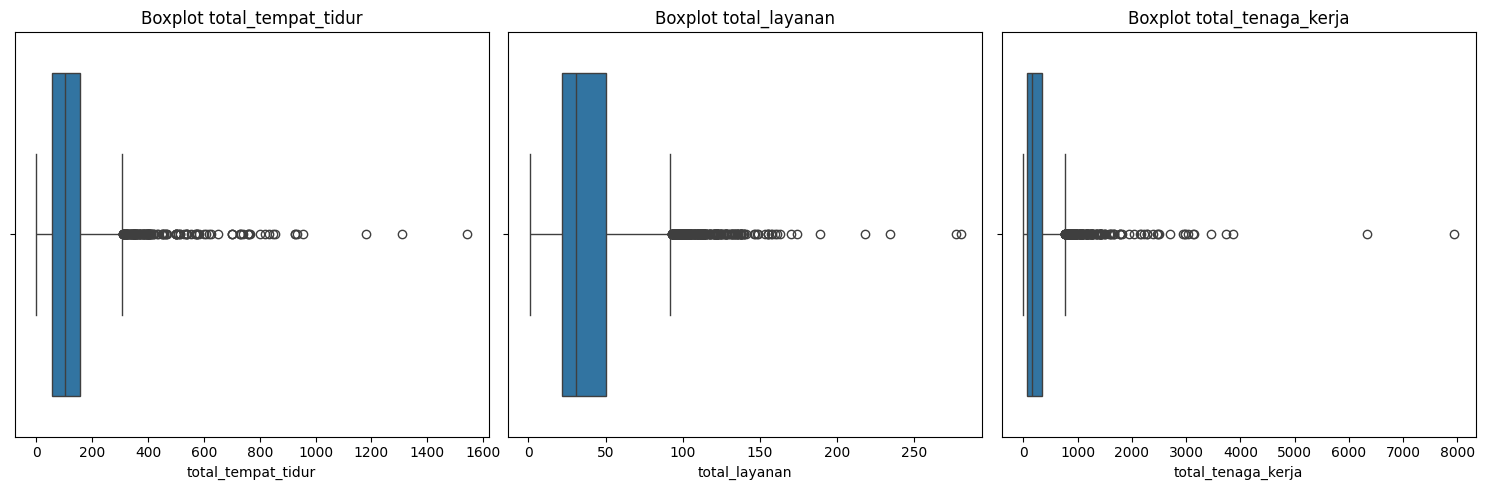

In [12]:
#Periksa outlier pada fitur numerik
numerik = ['total_tempat_tidur', 'total_layanan', 'total_tenaga_kerja']

# Boxplot untuk masing-masing fitur numerik
plt.figure(figsize=(15, 5))
for i, kolom in enumerate(numerik):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=nel[kolom])
    plt.title(f'Boxplot {kolom}')
plt.tight_layout()
plt.show()

In [13]:
#Menangani outlier
nel_clean = nel.copy()

# Daftar fitur numerik yang akan dicek
fitur_numerik = ['total_tempat_tidur', 'total_layanan', 'total_tenaga_kerja']

# Hitung IQR untuk setiap fitur numerik
Q1 = nel_clean[fitur_numerik].quantile(0.25)
Q3 = nel_clean[fitur_numerik].quantile(0.75)
IQR = Q3 - Q1

# Buang baris yang memiliki outlier pada salah satu fitur numerik
nel_clean = nel_clean[~((nel_clean[fitur_numerik] < (Q1 - 1.5 * IQR)) |
                        (nel_clean[fitur_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek hasil
print(f"Jumlah data setelah membuang outlier: {nel_clean.shape[0]}")


Jumlah data setelah membuang outlier: 2688


In [14]:
#Periksa ukuran data setelah dibersihkan
nel_clean.shape

(2688, 9)

In [15]:
#Menampilkan statistik data
nel_clean.describe()

,total_tempat_tidur,total_layanan,total_tenaga_kerja
count,2688.000000,2688.000000,2688.000000
mean,99.565848,33.438988,178.907366
std,58.822500,17.906801,165.527796
min,0.000000,1.000000,0.000000
25%,52.000000,21.000000,52.000000
50%,100.000000,29.000000,134.500000
75%,125.250000,41.000000,263.000000
max,306.000000,92.000000,761.000000


Setelah melakukan penanganan outlier dataset kita menjadi 2688 baris dan 11 kolom.

Berikut adalah insight yang diperoleh berdasarkan statistik deskriptif:
*   Jumlah Tempat Tidur di rumah sakit sangat bervariasi, mulai dari 0 hingga 306 unit. Rata-rata rumah sakit memiliki sekitar 99 tempat tidur, dengan kuartil atas (75%) berada di 125 tempat tidur, menunjukkan banyak rumah sakit kapasitas menengah ke bawah.

*   Jumlah Layanan yang tersedia berkisar antara 1 hingga 92. Nilai tengah (median) adalah 29 layanan, dengan rata-rata 33 layanan. Ini menunjukkan adanya rumah sakit yang sangat kecil dengan layanan terbatas, hingga yang sangat lengkap.

*   Jumlah Tenaga Kerja memiliki distribusi sangat lebar, dari 0 hingga 761 orang. Rata-ratanya adalah sekitar 179 tenaga kerja per rumah sakit, dengan standar deviasi yang tinggi (165), menandakan variasi yang besar antar rumah sakit.





# **Univariate**

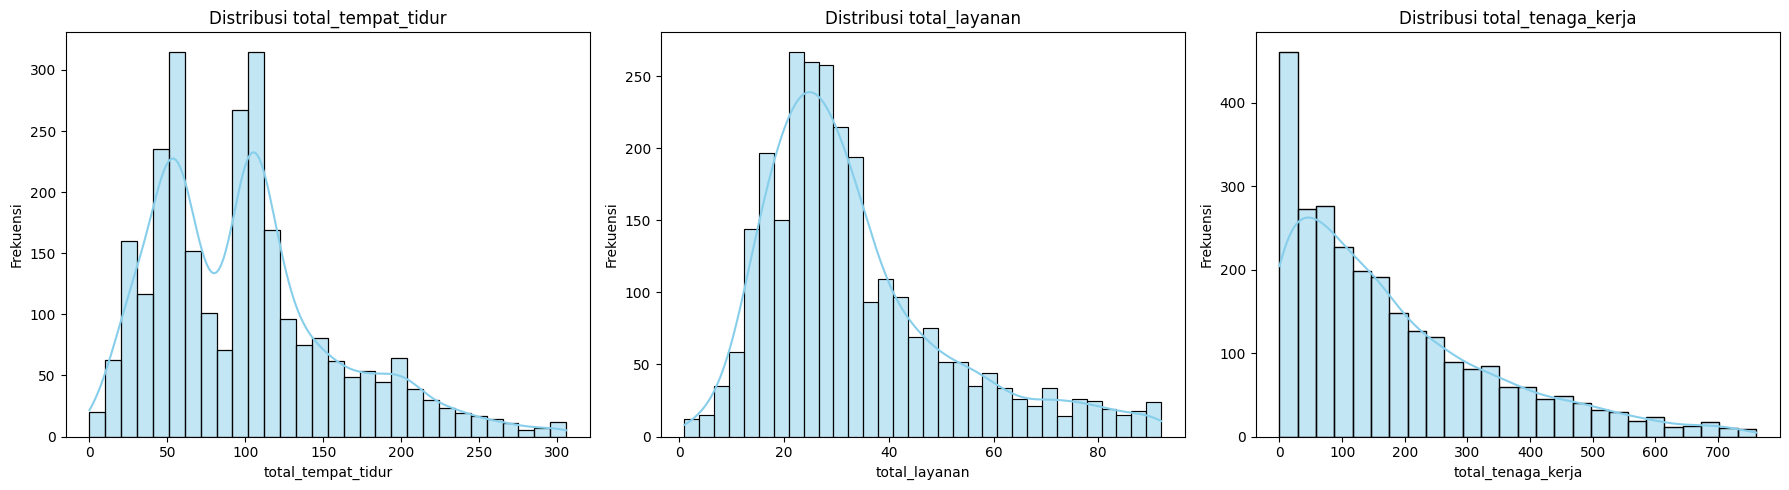

In [16]:
# List fitur numerik
numerik = ['total_tempat_tidur', 'total_layanan', 'total_tenaga_kerja']

# Buat subplots: 1 baris, 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Looping setiap kolom dan plotting ke masing-masing axes
for i, col in enumerate(numerik):
    sns.histplot(nel_clean[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


*   Distribusi total_tempat_tidur: Distribusi ini bersifat multimodal dengan beberapa puncak yang jelas terlihat, dan miring ke kanan (positively skewed). Ini menunjukkan bahwa mayoritas rumah sakit memiliki jumlah tempat tidur yang rendah hingga sedang, sementara hanya sebagian kecil yang memiliki jumlah tempat tidur sangat tinggi (hingga 300), yang menarik ekor distribusi ke kanan. Kondisi ini mungkin mencerminkan perbedaan kapasitas antara rumah sakit kecil dan rumah sakit besar atau pusat rujukan nasional.

*   Distribusi total_layanan: Distribusi total layanan tampak miring ke kanan (positively skewed). Sebagian besar rumah sakit menawarkan layanan dalam jumlah sedang (sekitar 20–40), sementara terdapat beberapa rumah sakit dengan jumlah layanan yang jauh lebih banyak, yang menyebabkan distribusi memiliki ekor panjang di sebelah kanan. Hal ini bisa jadi mencerminkan rumah sakit besar atau pusat kesehatan khusus dengan banyak layanan spesialis.

*  Distribusi total_tenaga_kerja: Distribusi ini sangat miring ke kanan (highly positively skewed). Mayoritas rumah sakit memiliki jumlah tenaga kerja yang relatif kecil hingga sedang, namun ada segelintir rumah sakit dengan jumlah tenaga kerja sangat besar (hingga lebih dari 700 orang). Nilai ekstrem ini mencerminkan keberadaan rumah sakit besar dengan skala operasional yang luas dan tenaga medis yang banyak.





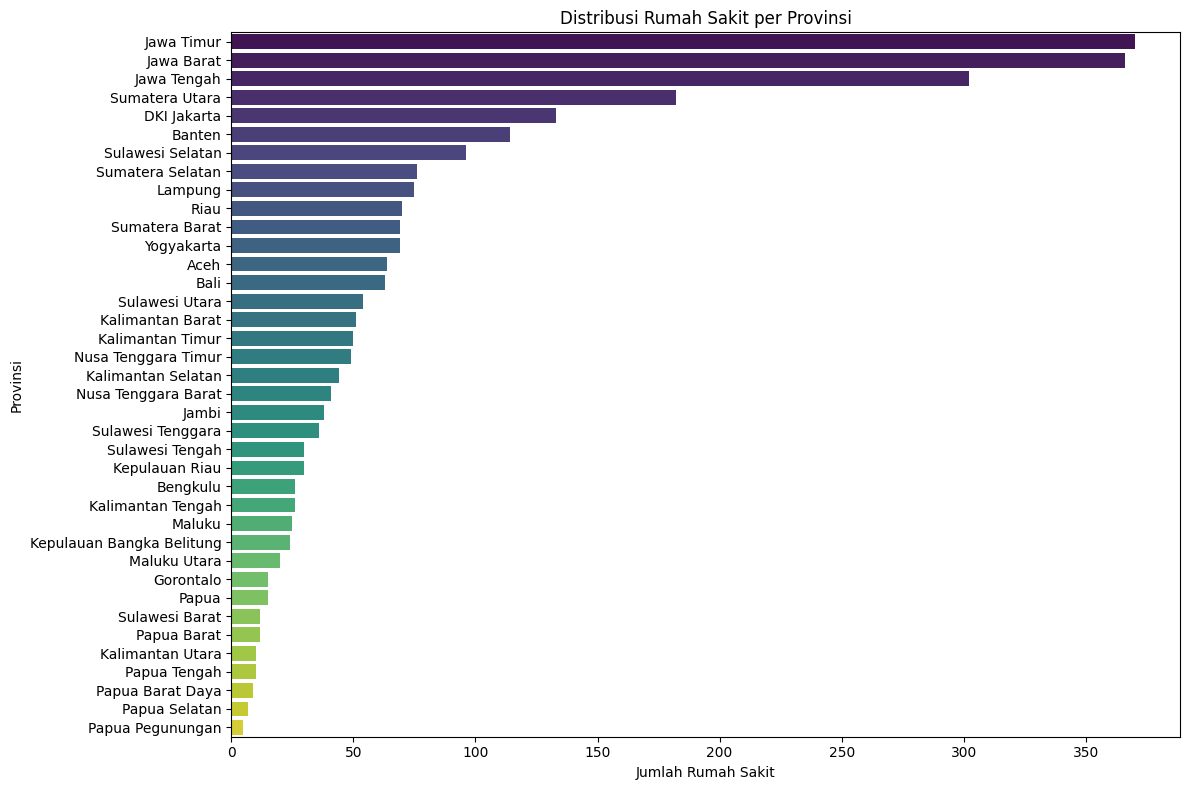

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='propinsi', data=nel_clean, order=nel_clean['propinsi'].value_counts().index, palette='viridis')
plt.title('Distribusi Rumah Sakit per Provinsi')
plt.xlabel('Jumlah Rumah Sakit')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

## Insight Distribusi Rumah Sakit per Provinsi di Indonesia
1. Pola Konsentrasi Rumah Sakit

* Provinsi Jawa Timur, Jawa Barat, dan Jawa Tengah mendominasi jumlah rumah sakit di Indonesia. Ketiga provinsi ini memiliki jumlah rumah sakit lebih dari 300, menunjukkan konsentrasi layanan kesehatan yang tinggi di Pulau Jawa.
* Sumatera Utara dan DKI Jakarta juga memiliki jumlah rumah sakit yang tinggi, mengindikasikan tingginya kebutuhan layanan kesehatan di daerah dengan kepadatan penduduk yang besar.

2. Ketimpangan Distribusi Antar Wilayah
* Provinsi-provinsi di bagian timur Indonesia seperti Papua, Papua Barat, Papua Pegunungan, dan Papua Selatan memiliki jumlah rumah sakit yang sangat sedikit (kurang dari 20). Hal ini menunjukkan adanya kesenjangan akses layanan kesehatan antar wilayah barat dan timur Indonesia.
* Provinsi seperti Nusa Tenggara Timur, Maluku, dan Sulawesi Barat juga memiliki jumlah rumah sakit yang relatif rendah dibandingkan dengan provinsi di Jawa dan Sumatera.

3. Provinsi dengan Jumlah Rumah Sakit Terendah
* Provinsi seperti Papua Pegunungan, Papua Selatan, dan Papua Barat Daya tercatat sebagai wilayah dengan jumlah rumah sakit paling sedikit di Indonesia, menandakan potensi masalah dalam aksesibilitas layanan kesehatan dasar di wilayah ini.

4. Indikasi Perluasan Fasilitas
* Wilayah-wilayah dengan jumlah rumah sakit terbatas kemungkinan memerlukan intervensi kebijakan berupa pembangunan rumah sakit baru atau distribusi ulang tenaga kesehatan.
* Pemerataan fasilitas kesehatan ini sangat krusial untuk memastikan keadilan sosial dan pemerataan pelayanan publik di seluruh wilayah Indonesia.

In [ ]:
#Menampilkan jumlah kab/kota yang memiliki rumah sakit
nel_clean['kab'].nunique()


493

# **Multivariate**

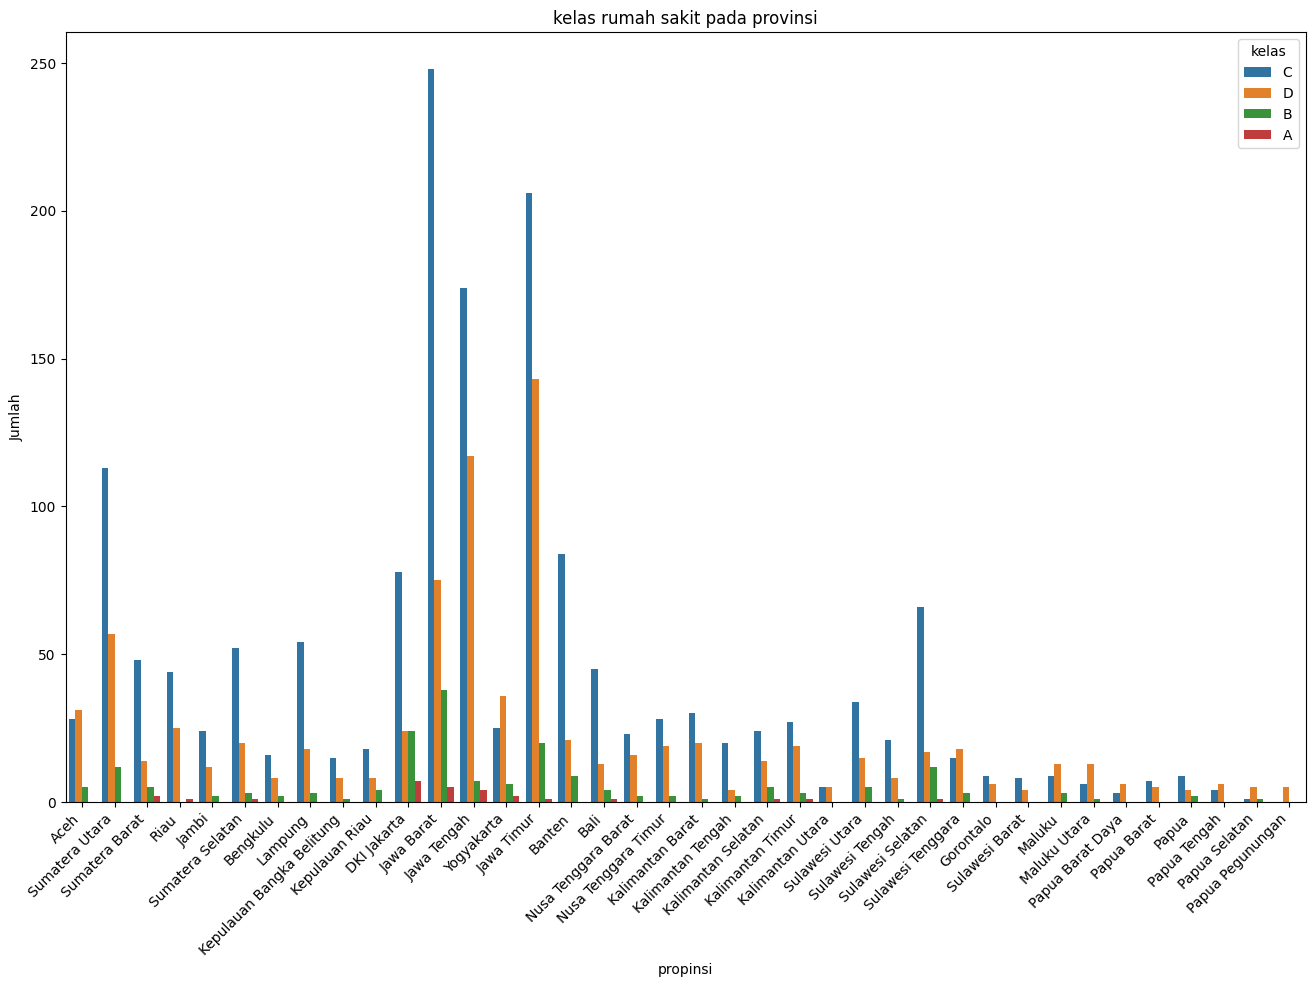

In [ ]:
# Menampilkan kelas rumah sakit pada provinsi dengan jumlah kela A,B,C,D
plt.figure(figsize=(16, 10))
sns.countplot(x=nel_clean['propinsi'], hue=nel_clean['kelas'],  data=nel_clean)
plt.xticks(rotation=45, ha='right')
plt.title('kelas rumah sakit pada provinsi')
plt.ylabel('Jumlah')
plt.show()

## Insight Distribusi Kelas Rumah Sakit per Provinsi
1. Dominasi Kelas C secara Nasional

* Kelas C secara konsisten mendominasi di hampir semua provinsi, terutama di
Jawa Timur (sekitar 240 RS kelas C) &
Jawa Barat, Jawa Tengah, dan DKI Jakarta
* Ini mengindikasikan bahwa rumah sakit dengan fasilitas tingkat menengah adalah yang paling umum secara nasional.

2. Distribusi Kelas A Sangat Terbatas
* Hanya beberapa provinsi yang memiliki rumah sakit kelas A dalam jumlah signifikan:
DKI Jakarta, Jawa Barat, Jawa Tengah, dan Jawa Timur
* Banyak provinsi sama sekali tidak memiliki rumah sakit kelas A, terutama di wilayah timur seperti: Papua, Papua Selatan, Papua Tengah, Papua Pegunungan, dan Maluku Utara
* Insight penting: Fitur provinsi sangat penting dalam mendeteksi kemungkinan kelas A — provinsi di luar Pulau Jawa sangat kecil peluangnya.

3. Kelas D Menjadi Penopang di Daerah Kurang Berkembang
* Kelas D cukup dominan di wilayah seperti:
Papua, Nusa Tenggara Timur, Maluku, Kalimantan Barat, dan Sulawesi Tenggara
* Biasanya mewakili rumah sakit kecil atau daerah terpencil.
* Dalam klasifikasi, provinsi-provinsi ini dapat menjadi indikator kuat untuk prediksi kelas D.

4. Kelas B Cenderung Menengah ke Atas dan Terpusat
* Kelas B ditemukan cukup banyak di: DKI Jakarta, Jawa Timur, Jawa Tengah, dan Jawa Barat.
* Juga muncul dalam jumlah kecil di provinsi urban lainnya seperti:
Sumatera Utara, Riau, Sulawesi Selatan.
* Insight penting: Provinsi besar di luar Jawa juga tidak bisa diabaikan sepenuhnya untuk kelas B.

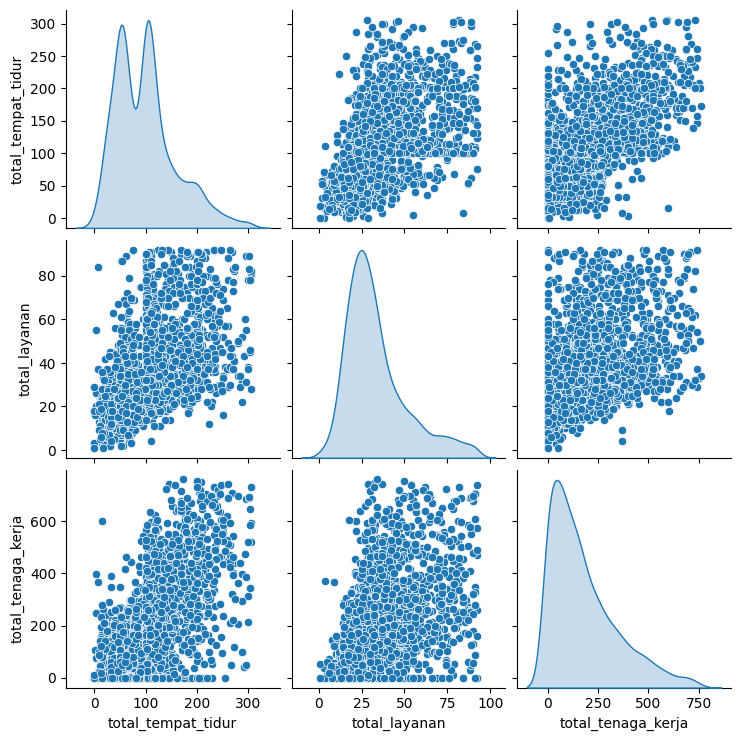

In [ ]:
sns.pairplot(nel_clean, diag_kind = 'kde')

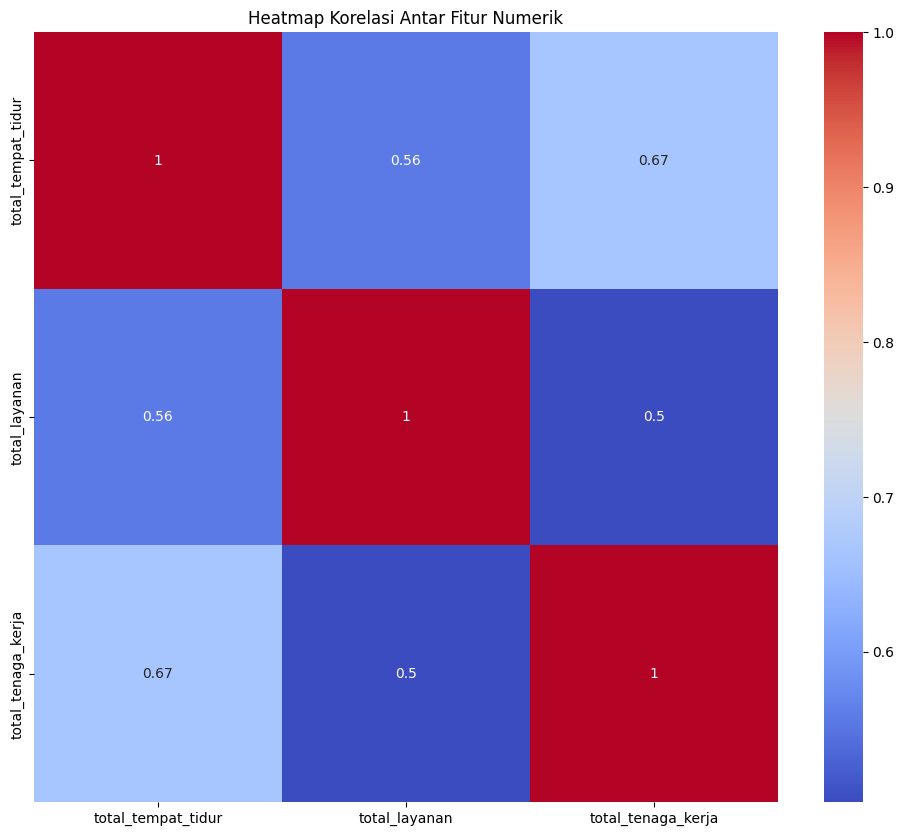

In [ ]:
# Heatmap korelasi fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(nel_clean[numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


## Insight Korelasi Antar Fitur Numerik Rumah Sakit
Heatmap ini menunjukkan hubungan linear antar fitur numerik dalam dataset, termasuk terhadap target klasifikasi_kemiskinan. Nilai korelasi berkisar antara -1 sampai 1:
* 1 = hubungan positif sempurna
* -1 = hubungan negatif sempurna
* 0 = tidak ada hubungan linear

| Pasangan Fitur                                  | Korelasi  | Interpretasi                                                                                                                                                                                                                       |
| ----------------------------------------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **total\_tempat\_tidur & total\_tenaga\_kerja** | **+0.67** | Korelasi **cukup kuat positif**. Rumah sakit dengan lebih banyak tempat tidur cenderung memiliki lebih banyak tenaga kerja. Hal ini **masuk akal operasional**, karena kapasitas lebih besar butuh SDM lebih banyak.               |
| **total\_tempat\_tidur & total\_layanan**       | **+0.56** | Korelasi **sedang positif**. Artinya makin banyak tempat tidur, layanan medis yang tersedia juga cenderung meningkat. Menunjukkan **ekspansi fasilitas** beriringan dengan peningkatan layanan.                                    |
| **total\_tenaga\_kerja & total\_layanan**       | **+0.50** | Korelasi **cukup positif**, meskipun lebih rendah dari yang lain. Bisa diartikan bahwa meskipun jumlah layanan bertambah, **tidak selalu secara proporsional menambah tenaga kerja** (mungkin karena efisiensi atau spesialisasi). |


# **Data Preparation**

In [ ]:
#label encode kelas

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Terapkan encoding pada kolom 'kelas'
nel_clean['kelas'] = label_encoder.fit_transform(nel_clean['kelas'])

# Cek hasil encode
print(nel_clean['kelas'].value_counts())
print(label_encoder.classes_)  # Menunjukkan urutan label asli



kelas
2    1621
3     852
1     188
0      27
Name: count, dtype: int64
['A' 'B' 'C' 'D']


Melakukan teknik label encode pada kolom kelas

In [ ]:
#Menghapus kolom provinsi, kab, jenis, status_blu, kepemilikan
nel_clean = nel_clean.drop(columns=['propinsi', 'kab', 'jenis', 'status_blu', 'kepemilikan'])
nel_clean.columns

Index(['kelas', 'total_tempat_tidur', 'total_layanan', 'total_tenaga_kerja'], dtype='object')

In [ ]:
# Pisahkan kolom target klasifikasi
X= nel_clean.drop(columns=['kelas'])
y= nel_clean[['kelas']]

In [ ]:
# Split data train dan test dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Melakukan teknik split data yaitu train dan test dengan rasio 80:20

In [ ]:
# Normalisasi menggunakan standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Melakukan normalisasi dengan menggunakan metode standard scaler agar data yang digunakan tidak memiliki penyimpangan yang besar.

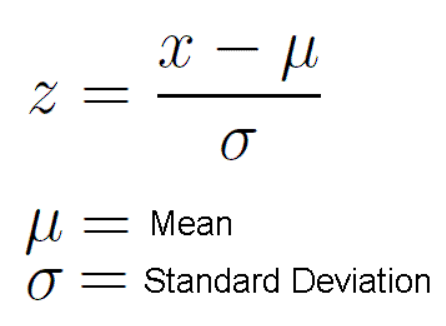

Metode ini bekerja dengan cara menghitung rata-rata dan standar deviasi dari data, kemudian membagi setiap nilai data dengan standar deviasi tersebut.

In [ ]:
# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train['kelas']))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE ke data train yang sudah dinormalisasi
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train['kelas'])

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_smote))


Distribusi sebelum SMOTE: Counter({2: 1297, 3: 681, 1: 150, 0: 22})
Distribusi setelah SMOTE: Counter({2: 1297, 3: 1297, 1: 1297, 0: 1297})


Saya menggunakan teknik Oversampling SMOTE untuk menangani permasalahan ketidakseimbangan kelas pada data latih.

SMOTE (Synthetic Minority Over-sampling Technique) merupakan metode yang digunakan ketika satu kelas (biasanya disebut kelas minoritas) memiliki jumlah sampel yang jauh lebih sedikit dibandingkan kelas lainnya (kelas mayoritas). Tujuan utama dari SMOTE adalah untuk menyeimbangkan distribusi kelas dengan menciptakan data sintetis baru untuk kelas minoritas, bukan hanya dengan menduplikasi data yang sudah ada.

Cara kerja SMOTE secara sederhana dapat dijelaskan sebagai berikut:

1. Mencari Tetangga Terdekat: Untuk setiap sampel di kelas minoritas, SMOTE akan mencari beberapa sampel lain dalam kelas yang sama yang memiliki kemiripan tertinggi (misalnya dari segi fitur atau nilai atribut).

2. Membuat Sampel Sintetis: Alih-alih menduplikasi sampel yang ada, SMOTE akan menghasilkan data baru yang berada di antara dua sampel yang mirip. Data sintetis ini dibuat dengan mengambil nilai-nilai di titik tengah antara dua sampel yang sudah ada.

3. Menambahkan Sampel Baru: Data baru hasil interpolasi ini kemudian ditambahkan ke dalam data latih, sehingga jumlah data pada kelas minoritas meningkat dan menjadi lebih seimbang dengan kelas mayoritas.

Melalui proses ini, SMOTE membantu model machine learning untuk belajar dari distribusi kelas yang lebih adil dan mengurangi bias terhadap kelas mayoritas.

# **Model Development**

In [ ]:
# Siapkan dataframe untuk menyimpan performa model
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'DecisionTree', 'RandomForest'], dtype='float')

# **K-Nearest Neighbour**

In [ ]:
# train model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_train_pred_knn = knn.predict(X_train_smote)
y_test_pred_knn  = knn.predict(X_test_scaled)

# Performa model pada test set
accuracy_knn  = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
recall_knn    = recall_score(y_test, y_test_pred_knn, average='weighted')
f1_score_knn  = f1_score(y_test, y_test_pred_knn, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'KNN']   = accuracy_knn
models.loc['precision', 'KNN'] = precision_knn
models.loc['recall', 'KNN']    = recall_knn
models.loc['f1_score', 'KNN']  = f1_score_knn


Model pertama yang saya gunakan adalah algoritma K-Nearest Neighbors (KNN), yaitu metode klasifikasi yang memprediksi label suatu data baru berdasarkan label dari K data terdekatnya dalam ruang fitur. Kedekatan antar data biasanya diukur menggunakan metrik jarak, seperti jarak Euclidean.

Cara kerja KNN dapat dijelaskan sebagai berikut:

1. Menentukan Nilai K: Tentukan jumlah tetangga terdekat yang akan digunakan dalam proses klasifikasi. Pada kasus ini, saya menggunakan nilai K = 5.

2. Menghitung Jarak: Hitung jarak antara data baru dengan seluruh data dalam dataset pelatihan menggunakan metrik jarak tertentu.

3. Menentukan K Tetangga Terdekat: Identifikasi K data pelatihan yang memiliki jarak paling dekat dengan data baru tersebut.

4. Melakukan Klasifikasi: Dari K tetangga terdekat, hitung frekuensi kemunculan setiap label kelas. Kelas yang paling sering muncul di antara tetangga tersebut akan menjadi prediksi label untuk data baru.

# **Decision Tree**

In [ ]:
# train model Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)
dtree.fit(X_train_smote, y_train_smote)

y_train_pred_dt = dtree.predict(X_train_smote)
y_test_pred_dt  = dtree.predict(X_test_scaled)

# Performa model pada test set
accuracy_dt  = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt, average='weighted')
recall_dt    = recall_score(y_test, y_test_pred_dt, average='weighted')
f1_score_dt  = f1_score(y_test, y_test_pred_dt, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'DecisionTree']   = accuracy_dt
models.loc['precision', 'DecisionTree']  = precision_dt
models.loc['recall', 'DecisionTree']     = recall_dt
models.loc['f1_score', 'DecisionTree']   = f1_score_dt


Selanjutnya, saya menggunakan algoritma Decision Tree, yaitu metode pembelajaran terawasi (supervised learning) yang dapat digunakan untuk menyelesaikan masalah klasifikasi maupun regresi. Algoritma ini membangun struktur menyerupai pohon, di mana:

* Setiap node internal mewakili suatu fitur atau atribut dari data,

* Setiap cabang mewakili kondisi atau aturan pengambilan keputusan berdasarkan nilai fitur tersebut,

* Dan setiap node daun (leaf) menunjukkan hasil akhir berupa label kelas atau nilai prediksi.

Tujuan utama dari Decision Tree adalah membentuk rangkaian aturan keputusan secara bertahap dalam bentuk pernyataan "jika-maka" (if-then), yang dapat digunakan untuk mengklasifikasikan data baru atau memprediksi nilainya berdasarkan atribut yang dimilikinya.

# **Random Forest**

In [ ]:
# train model Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=3)
rf.fit(X_train_smote, y_train_smote)

y_train_pred_rf = rf.predict(X_train_smote)
y_test_pred_rf  = rf.predict(X_test_scaled)

# Performa model pada test set
accuracy_rf  = accuracy_score(y_test, y_test_pred_rf)
precison_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
f1_score_rf  = f1_score(y_test, y_test_pred_rf, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'RandomForest']   = accuracy_rf
models.loc['precision', 'RandomForest'] = precison_rf
models.loc['recall', 'RandomForest']    = recall_rf
models.loc['f1_score', 'RandomForest'] = f1_score_rf

Terakhir, saya menggunakan algoritma Random Forest, sebuah metode supervised learning yang termasuk dalam kategori ensemble learning. Berbeda dengan pendekatan yang hanya mengandalkan satu model, Random Forest membangun sejumlah pohon keputusan (Decision Tree) secara independen. Setelah semua pohon terbentuk, hasil prediksi dari masing-masing pohon kemudian digabungkan untuk menghasilkan prediksi akhir.

Konsep dasar dari Random Forest adalah bahwa gabungan dari banyak model sederhana (dalam hal ini, pohon keputusan yang relatif lemah) dapat membentuk sebuah model yang lebih kuat, stabil, dan akurat. Pendekatan ini membantu mengurangi risiko overfitting yang umum terjadi pada model Decision Tree tunggal.

# **Evaluasi Models**

In [ ]:
print(models)

                KNN  DecisionTree  RandomForest
accuracy   0.698885      0.620818      0.596654
precision  0.781984      0.839560      0.765386
recall     0.698885      0.620818      0.596654
f1_score   0.727167      0.695723      0.611702


Insight Evaluasi Model

1. Model dengan Akurasi Tertinggi adalah K-Nearest Neighbors (KNN) dengan akurasi 69,89%, diikuti oleh Decision Tree dan Random Forest. Ini menunjukkan bahwa KNN lebih konsisten dalam memprediksi kelas rumah sakit secara keseluruhan.

2. Precision Tertinggi justru dimiliki oleh Decision Tree (83,96%), menunjukkan bahwa model ini lebih andal dalam menghindari prediksi yang salah untuk kelas minoritas — meskipun akurasinya lebih rendah. Hal ini bisa menunjukkan ketimpangan dalam distribusi kelas, di mana model Decision Tree lebih konservatif tetapi “tepat sasaran” ketika memberikan prediksi positif.

3. Recall dan F1-Score mengikuti tren yang sama dengan akurasi:

* Recall dan F1-Score tertinggi dimiliki oleh KNN, memperkuat bahwa model ini paling seimbang antara ketepatan dan kelengkapan dalam prediksi.

* Random Forest menunjukkan performa terendah di seluruh metrik, mengindikasikan bahwa konfigurasi atau tuning-nya mungkin belum optimal untuk dataset ini.

4. Kesimpulan Model Terbaik:

* KNN adalah model terbaik secara keseluruhan, karena memberikan keseimbangan terbaik antara accuracy, recall, dan f1-score.

* Decision Tree bisa dipertimbangkan apabila fokus analisis lebih berat pada precision (misalnya, jika salah klasifikasi lebih berdampak daripada tidak mengklasifikasikan).

* Random Forest memerlukan tuning lebih lanjut atau bisa digantikan, karena saat ini memiliki performa paling rendah.

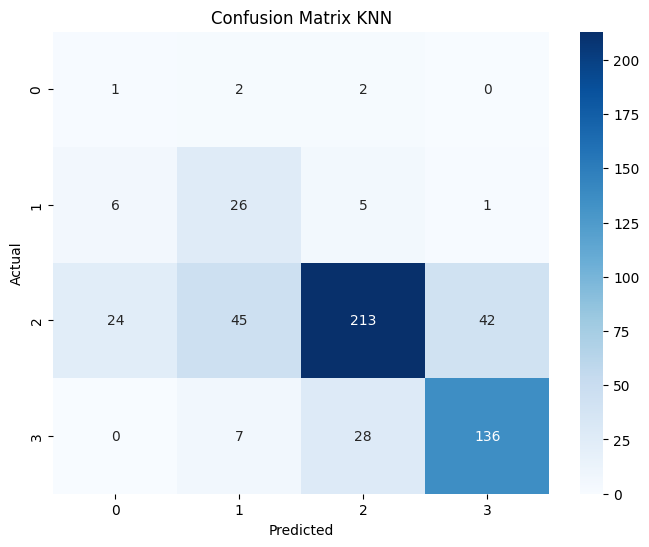

In [ ]:
# Confusion matrix KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

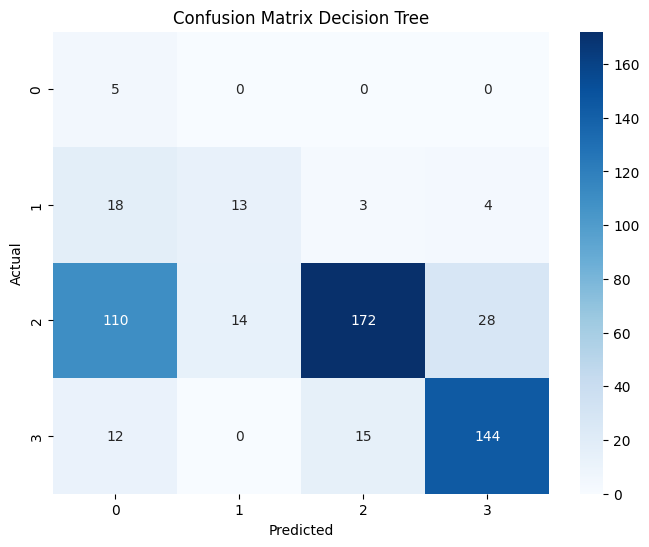

In [ ]:
# Confussion matrix Decision tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

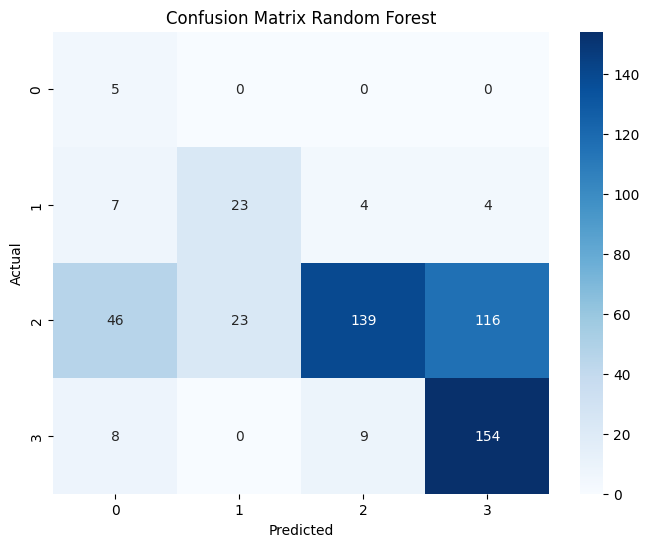

In [ ]:
# Confussion matrix Random forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

Kesimpulan:
* KNN adalah model terbaik dalam konteks klasifikasi tipe rumah sakit, karena memberikan performa menyeluruh yang paling stabil dan seimbang.

* Decision Tree bisa dipertimbangkan jika fokus utama adalah menghindari false positive, misalnya untuk kebijakan yang hanya boleh diterapkan jika prediksi sangat yakin.

* Random Forest memerlukan penyempurnaan, seperti hyperparameter tuning atau peningkatan kualitas data, sebelum layak digunakan sebagai model produksi.